In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import ipywidgets as widgets


In [4]:
w1 = widgets.IntSlider()

In [5]:
display(w1)

IntSlider(value=0)

In [6]:
from functools import wraps
def yield_for_change(widget, attribute):
    """Pause a generator to wait for a widget change event.

    This is a decorator for a generator function which pauses the generator on yield
    until the given widget attribute changes. The new value of the attribute is
    sent to the generator and is the value of the yield.
    """
    def f(iterator):
        @wraps(iterator)
        def inner():
            i = iterator()
            def next_i(change):
                try:
                    i.send(change.new)
                except StopIteration as e:
                    widget.unobserve(next_i, attribute)
            widget.observe(next_i, attribute)
            # start the generator
            next(i)
        return inner
    return f

In [7]:
@yield_for_change(w1, 'value')
def f():
    for i in range(10):
        print('did work %s'%i)
        x = yield
        print('generator function continued with value %s'%x)
f()

did work 0


In [9]:
f()

did work 0


In [10]:
@widgets.interact(x=True, y="hello")
def f(x,y):
    return(x,y)
    

interactive(children=(Checkbox(value=True, description='x'), Text(value='hello', description='y'), Output()), …

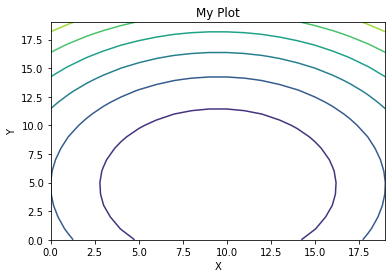

In [26]:
x = np.linspace(-10, 10, 20, dtype=float)
y = np.linspace(-5, 15, 20)
X, Y = np.meshgrid(x,y)
Z = X*X + Y*Y
fig, ax = plt.subplots()
ax.contour(Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('My Plot')
plt.show()

In [31]:
@widgets.interact(k=3.0)
def draw_graph(k):
    Z = X*X + k * Y*Y
    fig, ax = plt.subplots()
    ax.contour(Z)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('My Plot')
    plt.show()

interactive(children=(FloatSlider(value=3.0, description='k', max=9.0, min=-3.0), Output()), _dom_classes=('wi…

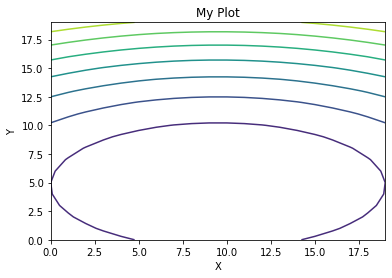

In [28]:
draw_graph(3)

In [32]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

In [35]:
debug_view = widgets.Output(layout={'border': '1px solid black'})

@debug_view.capture(clear_output=True)
def bad_callback(event):
    print('This is about to explode')
    return 1.0 / 0.0

button = widgets.Button(
    description='click me to raise an exception',
    layout={'width': '300px'}
)
button.on_click(bad_callback)
button

Button(description='click me to raise an exception', layout=Layout(width='300px'), style=ButtonStyle())

In [36]:
debug_view

Output(layout=Layout(border='1px solid black'))

In [38]:
import logging

class OutputWidgetHandler(logging.Handler):
    """ Custom logging handler sending logs to an output widget """

    def __init__(self, *args, **kwargs):
        super(OutputWidgetHandler, self).__init__(*args, **kwargs)
        layout = {
            'width': '100%',
            'height': '160px',
            'border': '1px solid black'
        }
        self.out = widgets.Output(layout=layout)

    def emit(self, record):
        """ Overload of logging.Handler method """
        formatted_record = self.format(record)
        new_output = {
            'name': 'stdout',
            'output_type': 'stream',
            'text': formatted_record+'\n'
        }
        self.out.outputs = (new_output, ) + self.out.outputs

    def show_logs(self):
        """ Show the logs """
        display(self.out)

    def clear_logs(self):
        """ Clear the current logs """
        self.out.clear_output()


logger = logging.getLogger(__name__)
handler = OutputWidgetHandler()
handler.setFormatter(logging.Formatter('%(asctime)s  - [%(levelname)s] %(message)s'))
logger.addHandler(handler)
logger.setLevel(logging.INFO)

In [39]:
handler.show_logs()

Output(layout=Layout(border='1px solid black', height='160px', width='100%'))

In [40]:
handler.clear_logs()
logger.info('Starting program')

try:
    logger.info('About to try something dangerous...')
    1.0/0.0
except Exception as e:
    logger.exception('An error occurred!')

In [41]:
import threading
from IPython.display import display, HTML
import ipywidgets as widgets
import time

def thread_func(something, out):
    for i in range(1, 5):
        time.sleep(0.3)
        out.append_stdout('{} {} {}\n'.format(i, '**'*i, something))
    out.append_display_data(HTML("<em>All done!</em>"))

display('Display in main thread')
out = widgets.Output()
# Now the key: the container is displayed (while empty) in the main thread
display(out)

thread = threading.Thread(
    target=thread_func,
    args=("some text", out))
thread.start()

'Display in main thread'

Output()

In [42]:
thread.join()